In [2]:
import torch
from train import trainGPT, SanityConfig
from dataclasses import dataclass
from transformers import AutoTokenizer
from data_gen import gen_grok_data
from tqdm import tqdm
import random
import numpy as np

In [3]:
@dataclass
class GrokConfig:
    block_size: int = 1024
    vocab_size: int = 50304
    n_layer: int = 1
    n_head: int = 4
    n_embd: int = 128
    dropout: float = 0.0
    bias: bool = True  

In [4]:
config = GrokConfig()
tokenizer = AutoTokenizer.from_pretrained('google/byt5-base')
config.vocab_size = tokenizer.vocab_size
tokenizer.pad_token = tokenizer.eos_token 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
p_values = [97, 113]
seeds = [42, 1234, 2025]
train_loss_curves = []
val_loss_curves = []
train_accs = []
val_accs = []
models = []
for num_layers in range(2):
    config.n_layer  = num_layers + 1
    for p in p_values:
        for i in range(2):
            # addition or sutraction
            a = (i==0)
            s = (i==1)
            name = 'addition' if i == 0 else 'subtract'
            train, test = gen_grok_data([p], train_split=0.50, a=a, s=s, d=False)
            for t in range(3):
                # random restart
                seed = seeds[t]
                torch.manual_seed(seed)
                np.random.seed(seed)
                random.seed(seed)
                print(f"Starting training for: p={p}, layers={config.n_layer}, type={name}, seed={seed}")
                filename = "p" + str(p) + '_' + str(num_layers) + 'layer' + name + 'seed' + str(seed)



                model, train_loss, val_loss, train_acc, val_acc = trainGPT(config, 
                 tokenizer, 
                 train, 
                 test, 
                 device=device, 
                 epochs=100000, 
                 weight_decay=0.05, # params from the paper
                 batch_size=512,
                 lr=1e-4,
                 betas=[0.9, 0.98],
                 max_steps=1e5,
                 grokking=True,
                 filename=filename)
                train_loss_curves.append(train_loss)
                val_loss_curves.append(val_loss)
                train_accs.append(train_acc)
                val_accs.append(val_acc)
                models.append(model)



Starting training for: p=97, layers=1, type=addition, seed=42
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [09:02<00:00, 184.32it/s, loss=9.809177292652294e-09, train_acc=0.9999999403953552, val_loss=0.005707443226128817, val_acc=0.9987630844116211, step=99990]  


Reached Max Optimizer Steps
Starting training for: p=97, layers=1, type=addition, seed=1234
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [09:54<00:00, 168.07it/s, loss=1.1865977356251279e-08, train_acc=0.9999999403953552, val_loss=0.009100943803787231, val_acc=0.9989692568778992, step=99990] 


Reached Max Optimizer Steps
Starting training for: p=97, layers=1, type=addition, seed=2025
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [07:08<00:00, 233.51it/s, loss=2.4738871928775553e-08, train_acc=0.9999999403953552, val_loss=0.0022707462776452303, val_acc=0.9991753697395325, step=99990] 


Reached Max Optimizer Steps
Starting training for: p=97, layers=1, type=subtract, seed=42
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [10:32<00:00, 158.02it/s, loss=1.3142442867319914e-08, train_acc=1.0, val_loss=0.00018598177121020854, val_acc=0.9995878338813782, step=99995]             


Reached Max Optimizer Steps
Starting training for: p=97, layers=1, type=subtract, seed=1234
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [13:26<00:00, 124.05it/s, loss=1.1942827882194252e-08, train_acc=1.0, val_loss=2.879056459903495e-08, val_acc=1.0, step=99995]                              


Reached Max Optimizer Steps
Starting training for: p=97, layers=1, type=subtract, seed=2025
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [13:22<00:00, 124.59it/s, loss=2.876586535194292e-07, train_acc=1.0, val_loss=1.1374066843927721e-06, val_acc=1.0, step=99995]                              


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=addition, seed=42
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [07:35<00:00, 219.55it/s, loss=2.9525215229962388e-08, train_acc=0.9999999403953552, val_loss=0.027541305869817734, val_acc=0.9937452077865601, step=99996]


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=addition, seed=1234
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [07:32<00:00, 221.20it/s, loss=9.288084899485337e-09, train_acc=0.9999999403953552, val_loss=0.03336226940155029, val_acc=0.9942028522491455, step=99996]  


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=addition, seed=2025
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [07:31<00:00, 221.25it/s, loss=7.313300111141311e-07, train_acc=0.9999999403953552, val_loss=0.03641147539019585, val_acc=0.9914568662643433, step=99996]  


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=subtract, seed=42
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [07:47<00:00, 213.87it/s, loss=3.2112294791529295e-07, train_acc=1.0, val_loss=0.03129475563764572, val_acc=0.9957290887832642, step=99995]               


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=subtract, seed=1234
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [07:48<00:00, 213.43it/s, loss=1.529840546307274e-08, train_acc=1.0, val_loss=0.03892490640282631, val_acc=0.994813859462738, step=99995]                 


Reached Max Optimizer Steps
Starting training for: p=113, layers=1, type=subtract, seed=2025
number of parameters: 0.23M
num decayed parameter tensors: 6, with 360,448 parameters
num non-decayed parameter tensors: 10, with 1,920 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [07:49<00:00, 213.06it/s, loss=1.6071770707932435e-08, train_acc=1.0, val_loss=0.042368266731500626, val_acc=0.9942037463188171, step=99995]               


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=addition, seed=42
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [10:06<00:00, 164.94it/s, loss=8.025093523045258e-09, train_acc=0.9999999403953552, val_loss=7.553686828032369e-06, val_acc=0.9999999403953552, step=99990]  


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=addition, seed=1234
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [10:07<00:00, 164.47it/s, loss=5.590838627540506e-05, train_acc=0.9999999403953552, val_loss=0.0012396518141031265, val_acc=0.9991753697395325, step=99990] 


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=addition, seed=2025
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99990/100000.0 [10:08<00:00, 164.42it/s, loss=4.3405715041444636e-05, train_acc=0.9999999403953552, val_loss=0.008811669424176216, val_acc=0.9969078302383423, step=99990] 


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=subtract, seed=42
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [10:21<00:00, 160.96it/s, loss=2.3580875252449117e-09, train_acc=1.0, val_loss=0.0008015941712073982, val_acc=0.9995878338813782, step=99995]               


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=subtract, seed=1234
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [10:22<00:00, 160.54it/s, loss=9.100860509647646e-09, train_acc=1.0, val_loss=1.578048802741705e-08, val_acc=1.0, step=99995]                              


Reached Max Optimizer Steps
Starting training for: p=97, layers=2, type=subtract, seed=2025
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [10:38<00:00, 156.53it/s, loss=9.078403717666106e-09, train_acc=1.0, val_loss=8.284080976750374e-09, val_acc=1.0, step=99995]                              


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=addition, seed=42
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [11:01<00:00, 151.12it/s, loss=9.876095975213362e-09, train_acc=0.9999999403953552, val_loss=0.025530371814966202, val_acc=0.9935926198959351, step=99996] 


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=addition, seed=1234
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [11:02<00:00, 151.00it/s, loss=9.319825868312993e-09, train_acc=0.9999999403953552, val_loss=0.04650913551449776, val_acc=0.9899312853813171, step=99996]  


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=addition, seed=2025
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99996/100000.0 [10:51<00:00, 153.49it/s, loss=4.2680249092742226e-05, train_acc=0.9999999403953552, val_loss=0.05244583263993263, val_acc=0.9829137325286865, step=99996] 


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=subtract, seed=42
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [11:03<00:00, 150.60it/s, loss=1.7393883159197036e-08, train_acc=1.0, val_loss=0.024206120520830154, val_acc=0.996949315071106, step=99995]               


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=subtract, seed=1234
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [11:08<00:00, 149.61it/s, loss=1.2345387797755132e-07, train_acc=1.0, val_loss=0.017122406512498856, val_acc=0.9972543716430664, step=99995]               


Reached Max Optimizer Steps
Starting training for: p=113, layers=2, type=subtract, seed=2025
number of parameters: 0.43M
num decayed parameter tensors: 10, with 557,056 parameters
num non-decayed parameter tensors: 18, with 3,584 parameters
using fused AdamW: True


Training Progress: 100%|█████████▉| 99995/100000.0 [11:08<00:00, 149.67it/s, loss=2.7761956776625345e-05, train_acc=1.0, val_loss=0.03041887655854225, val_acc=0.9954239726066589, step=99995]               

Reached Max Optimizer Steps


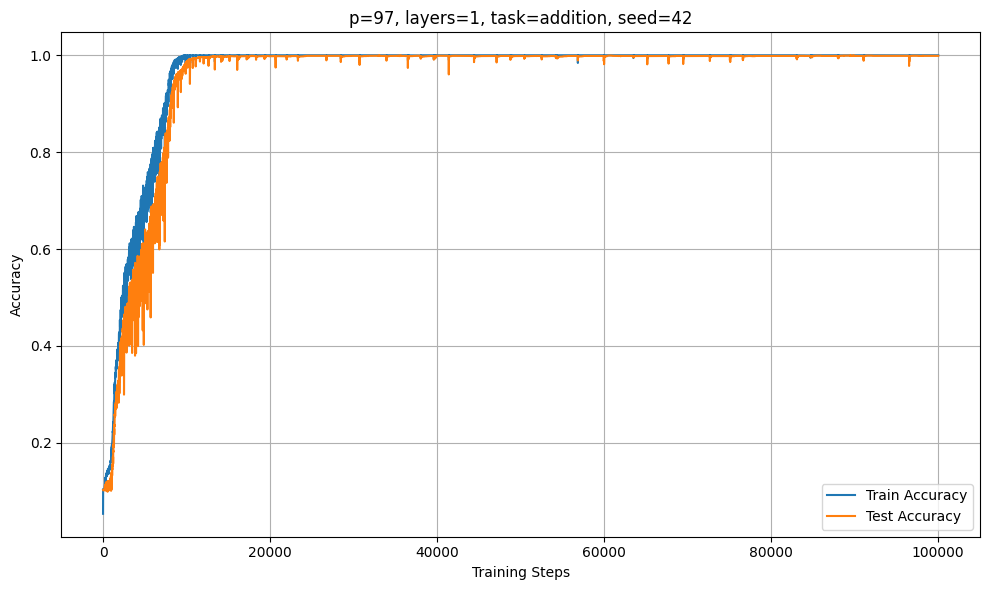

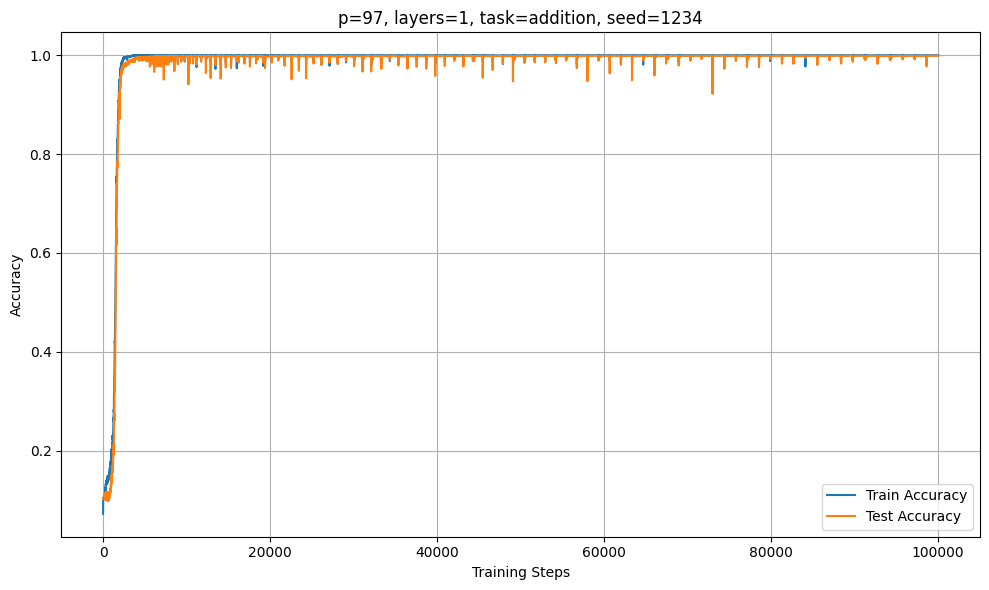

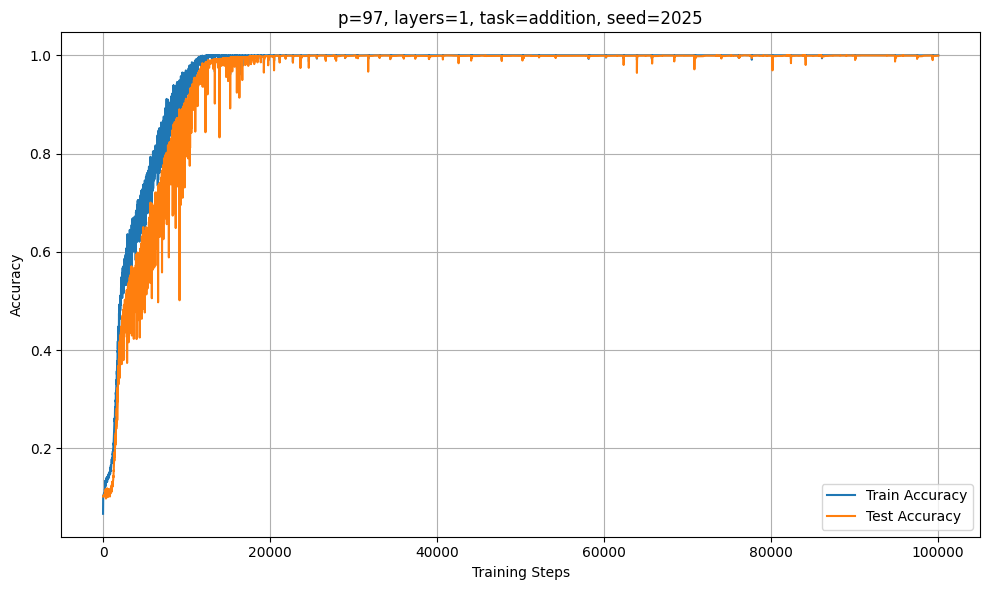

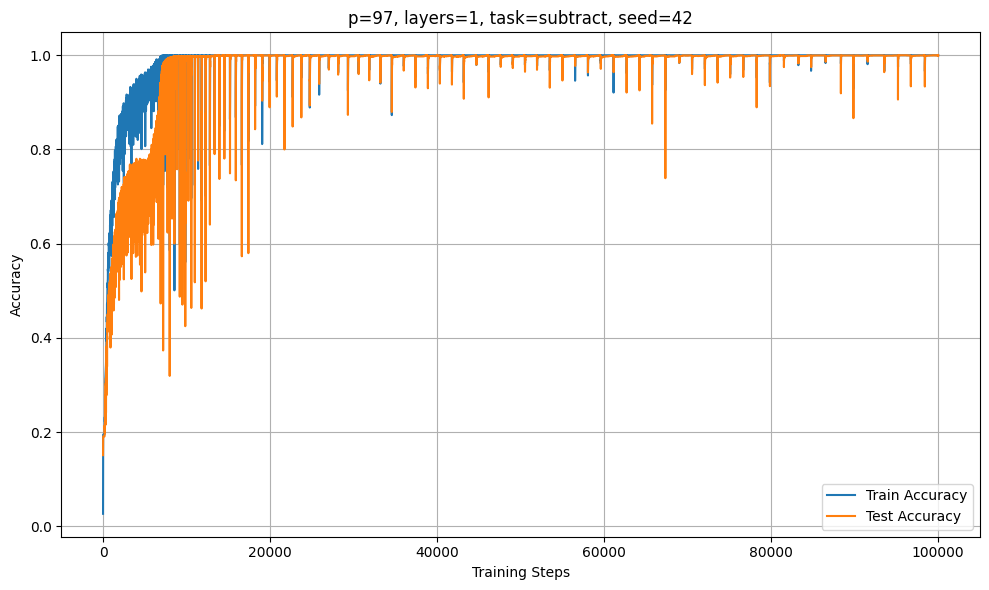

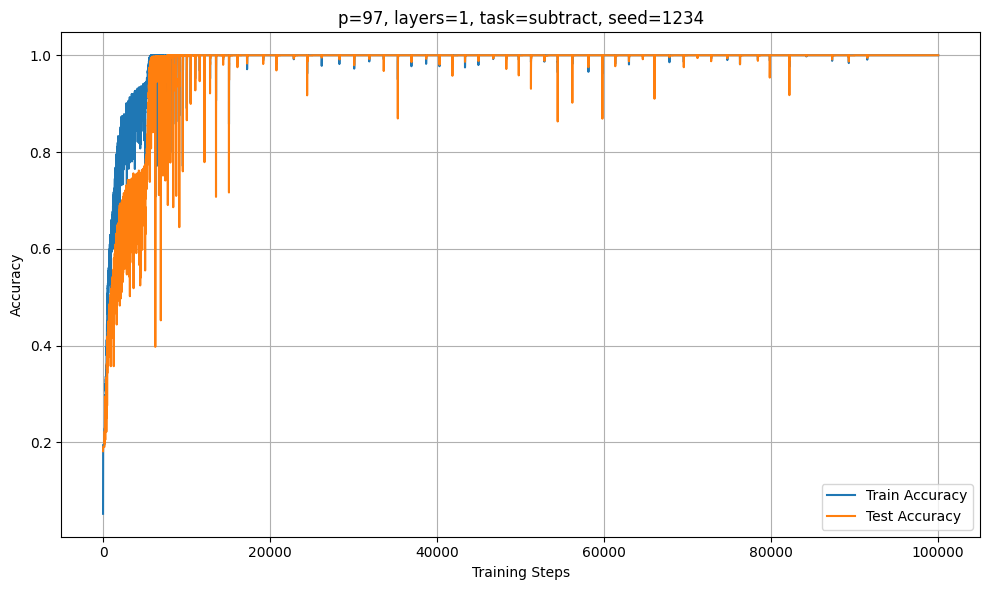

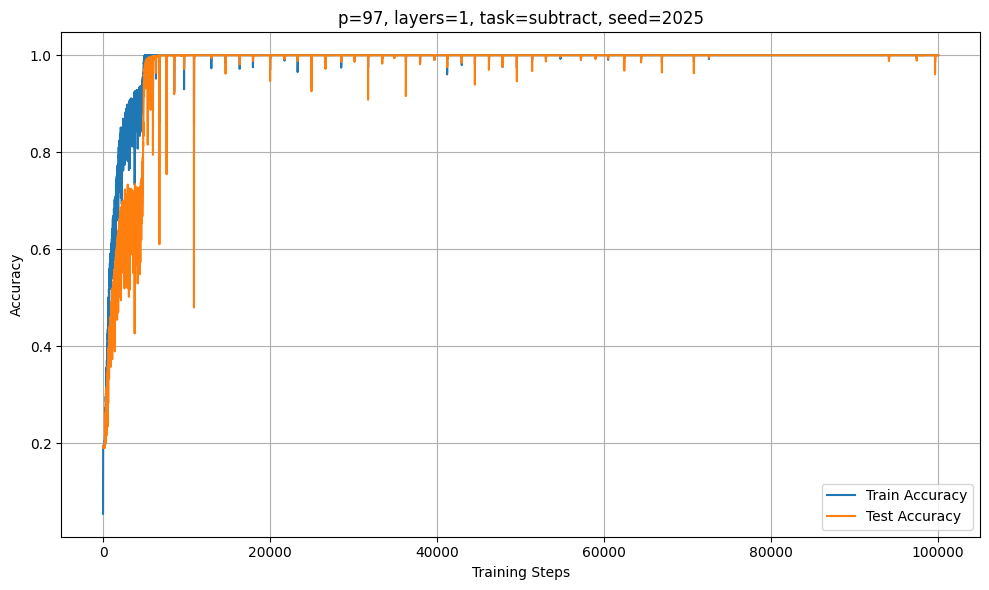

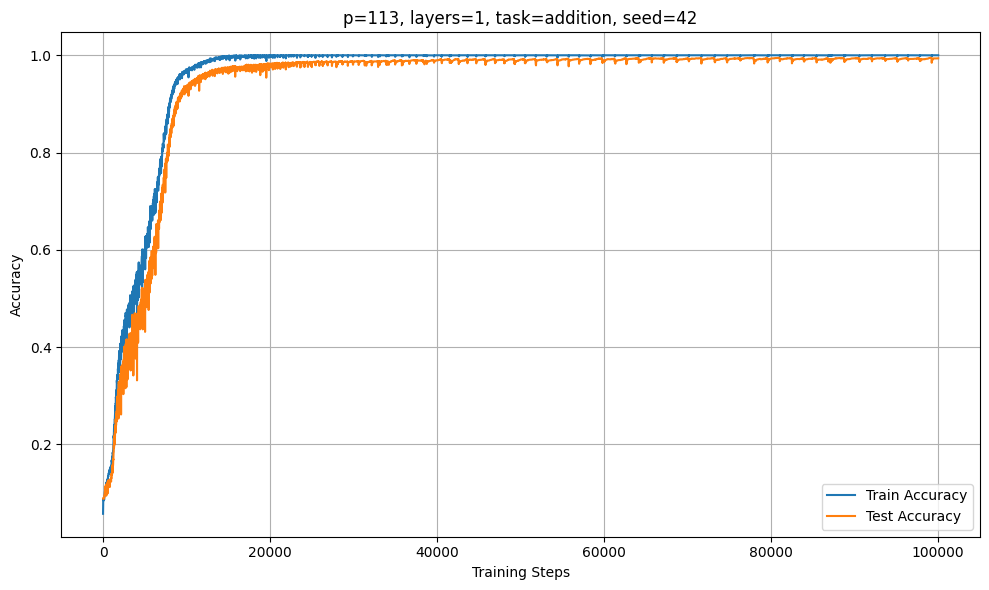

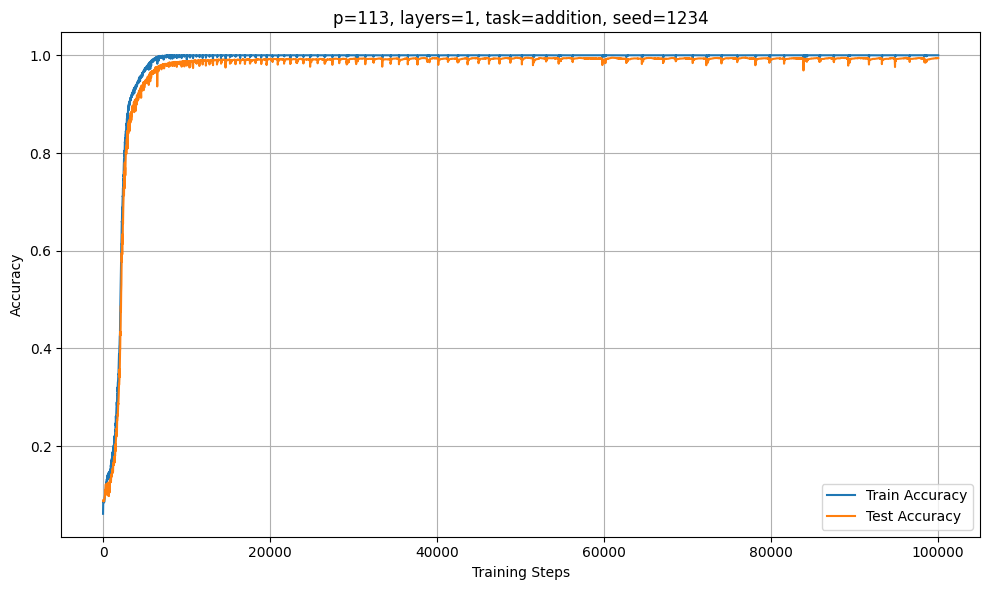

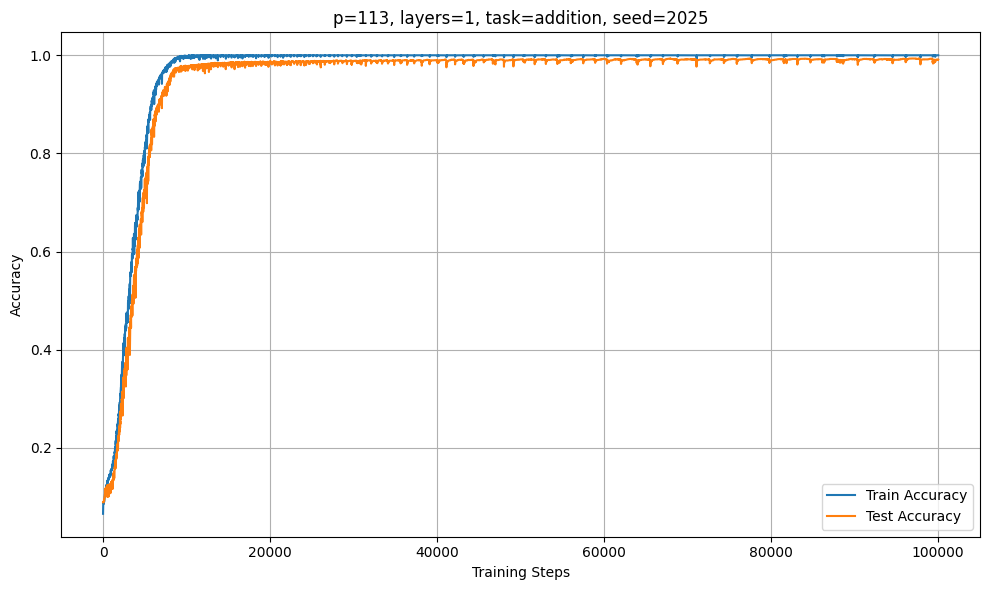

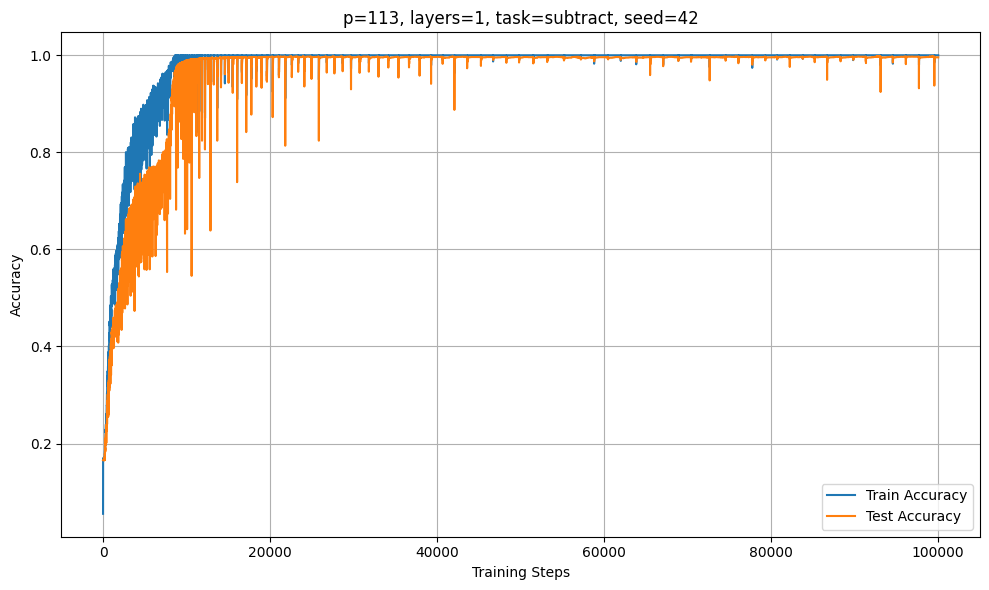

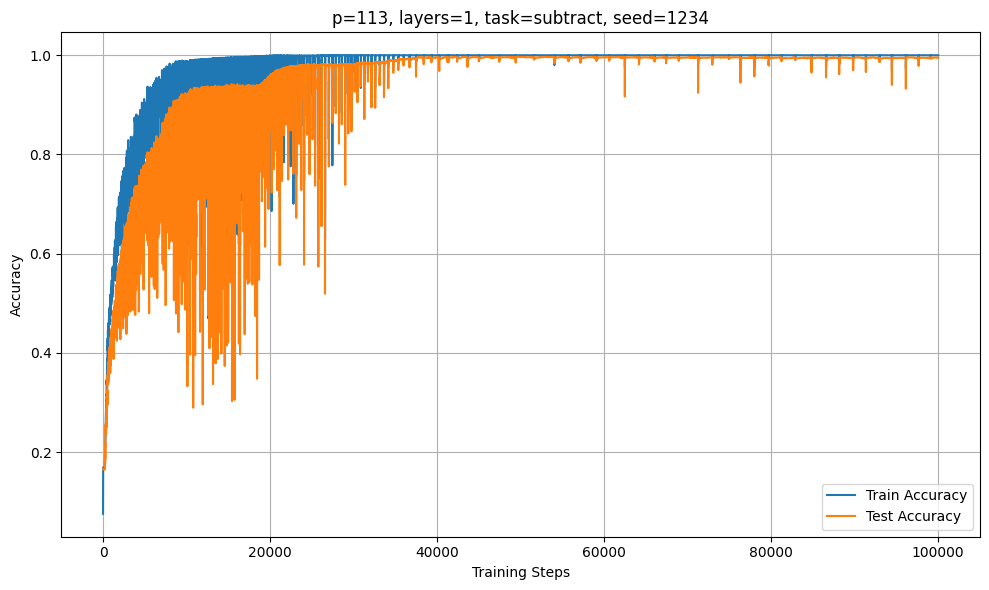

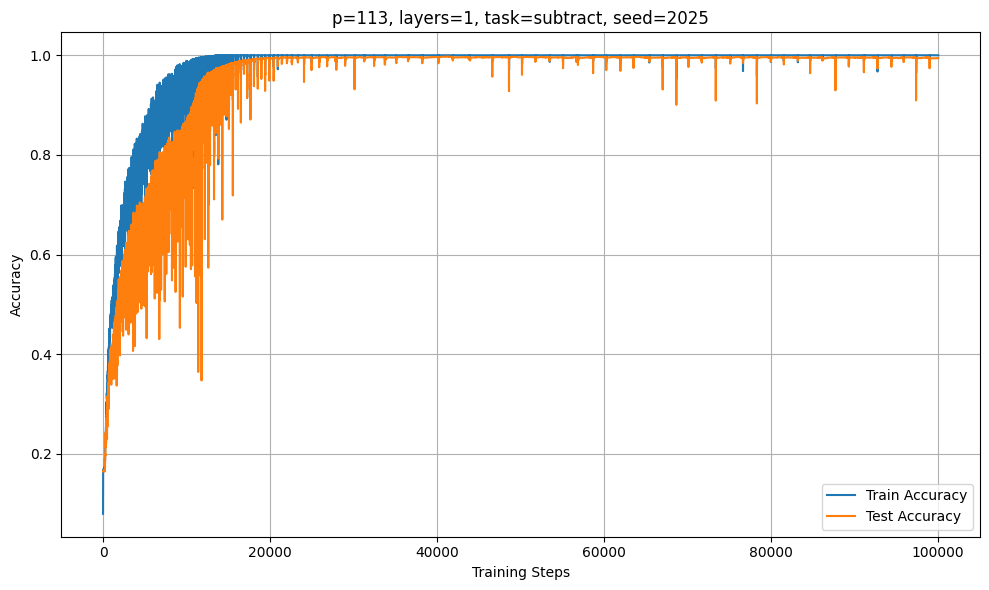

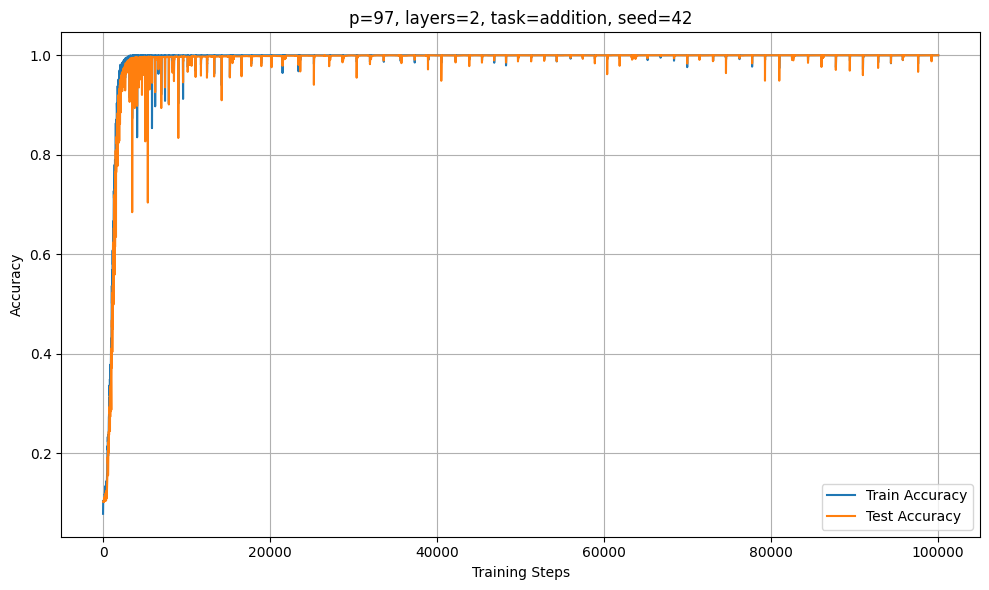

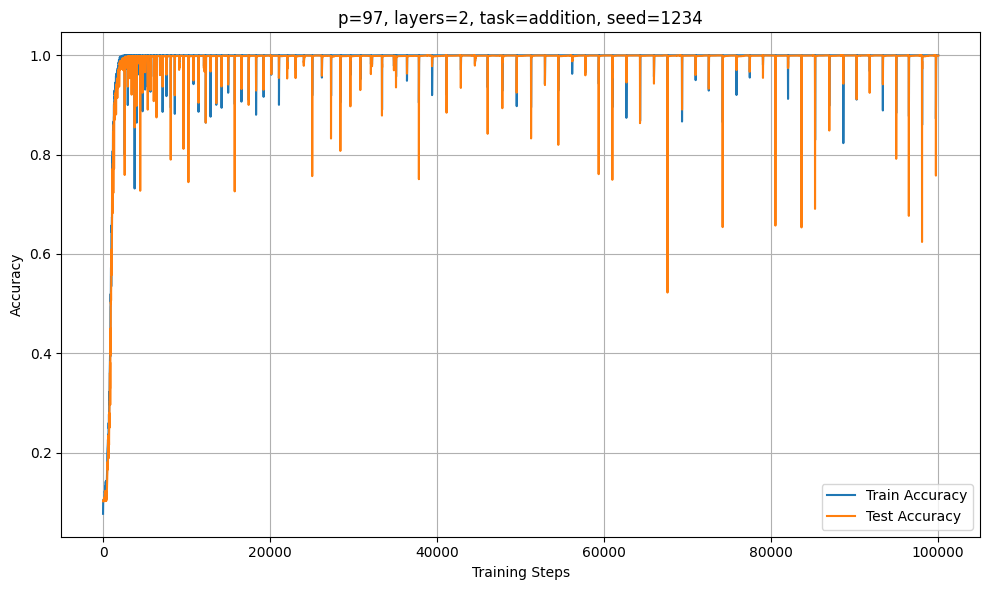

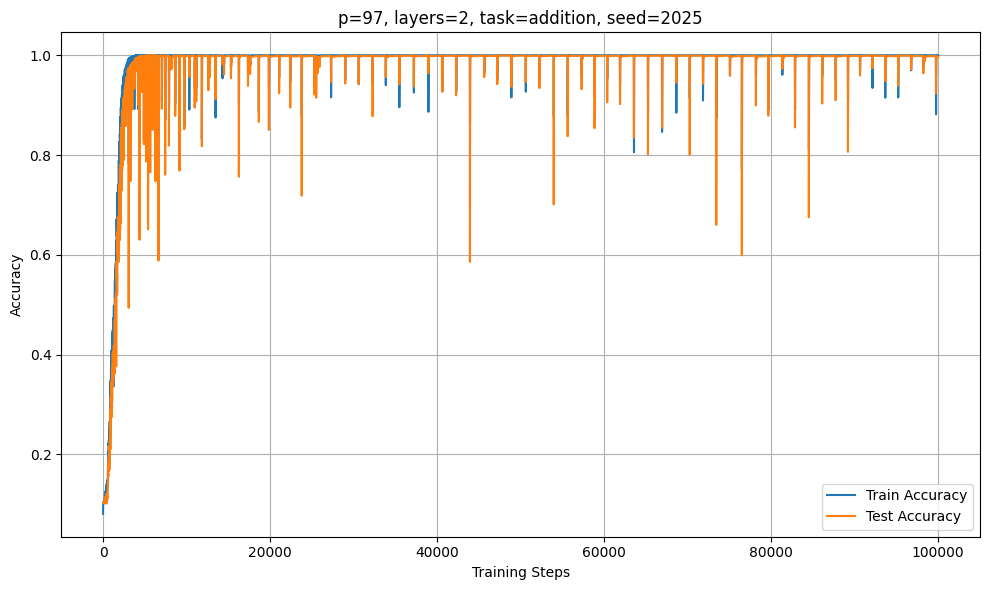

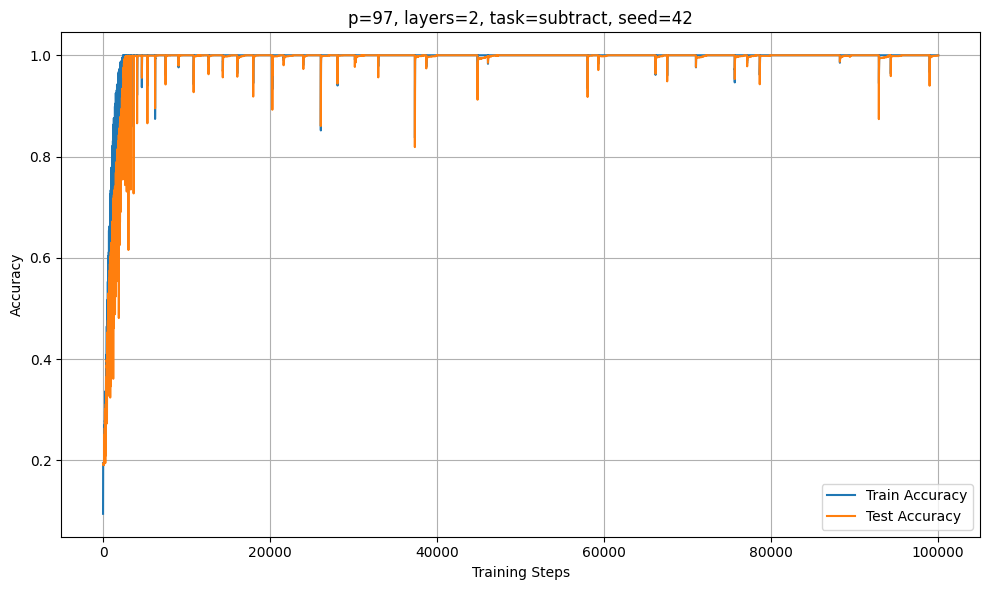

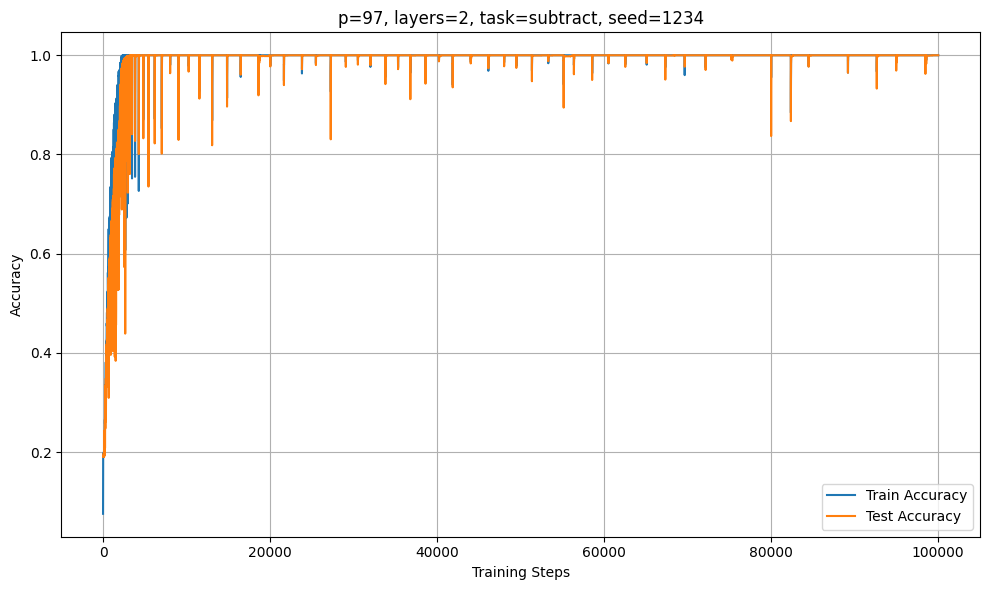

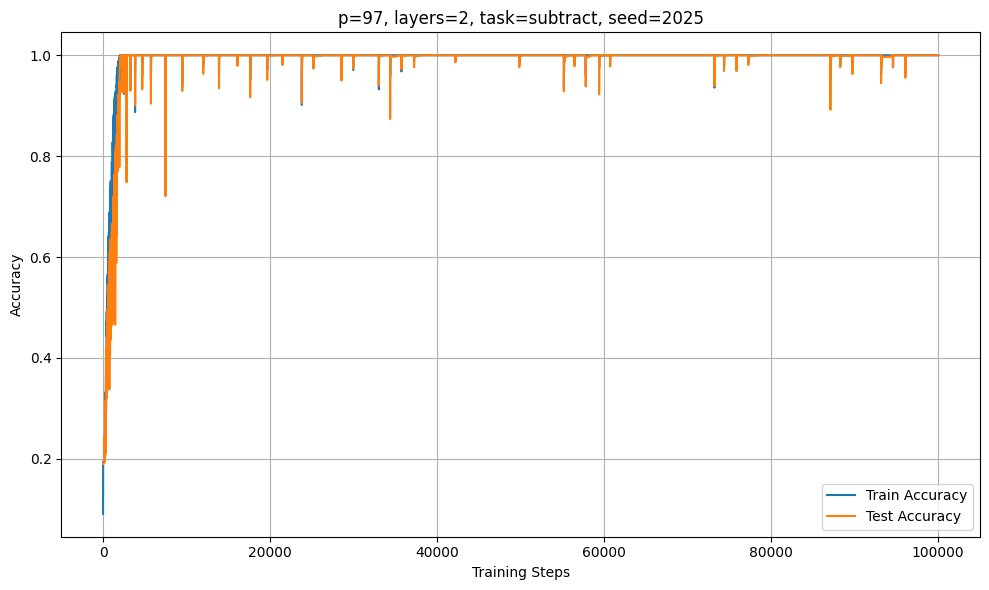

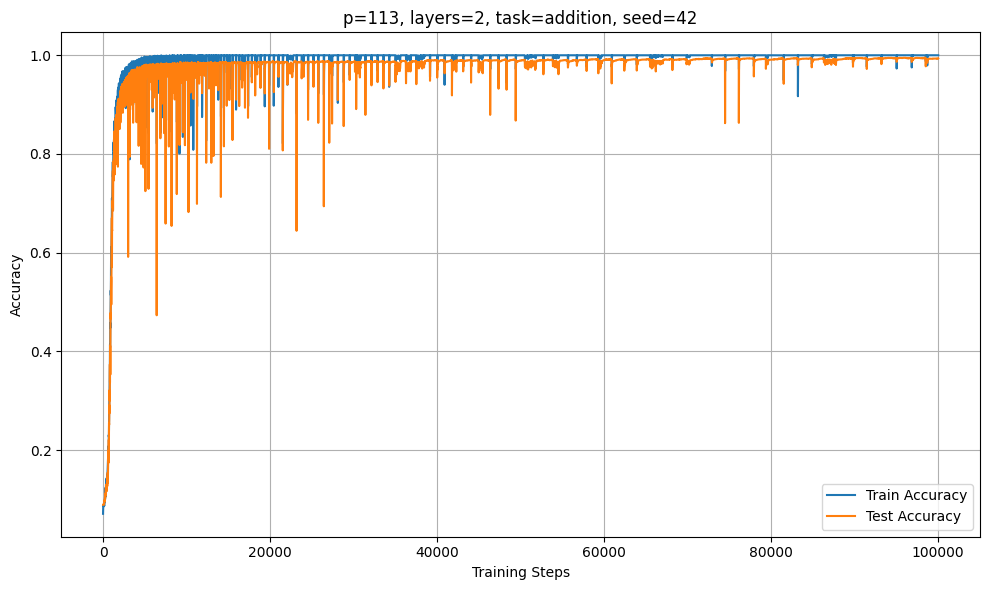

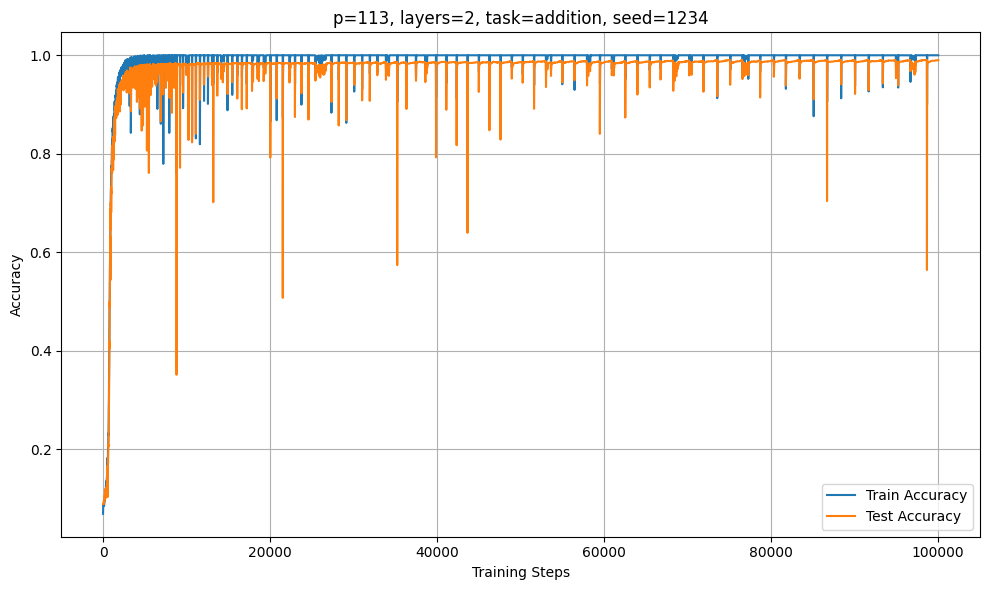

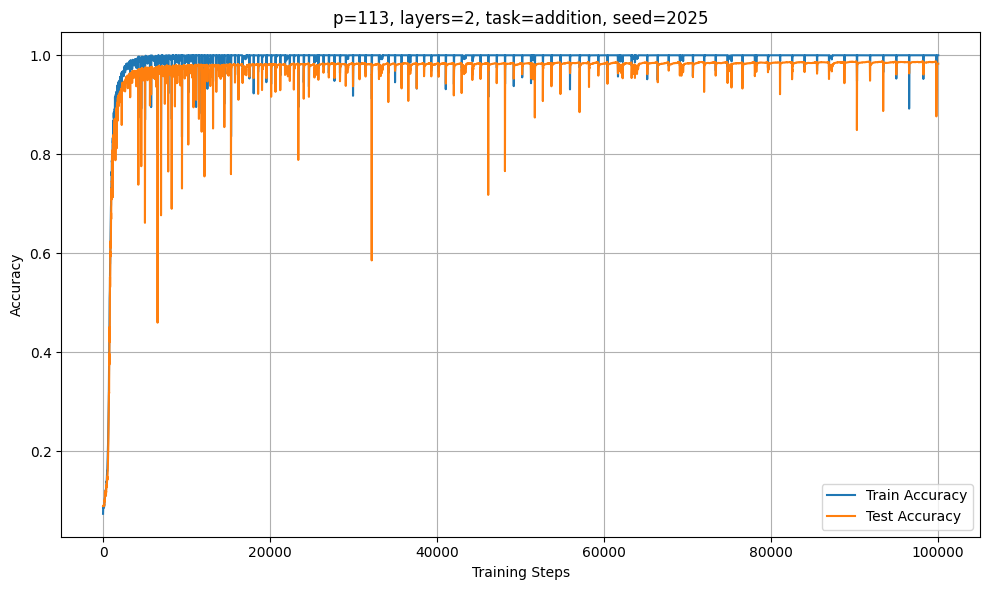

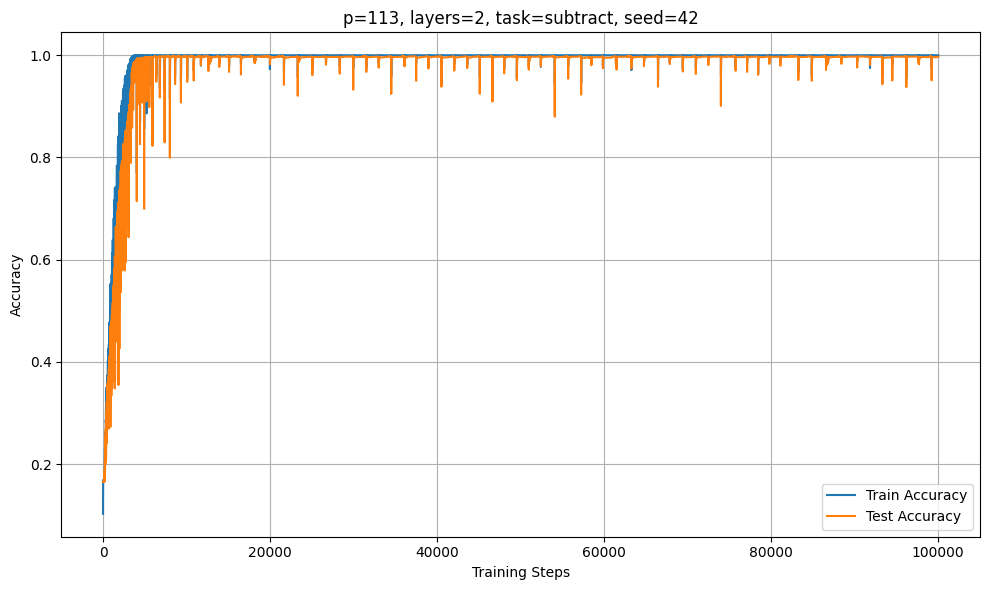

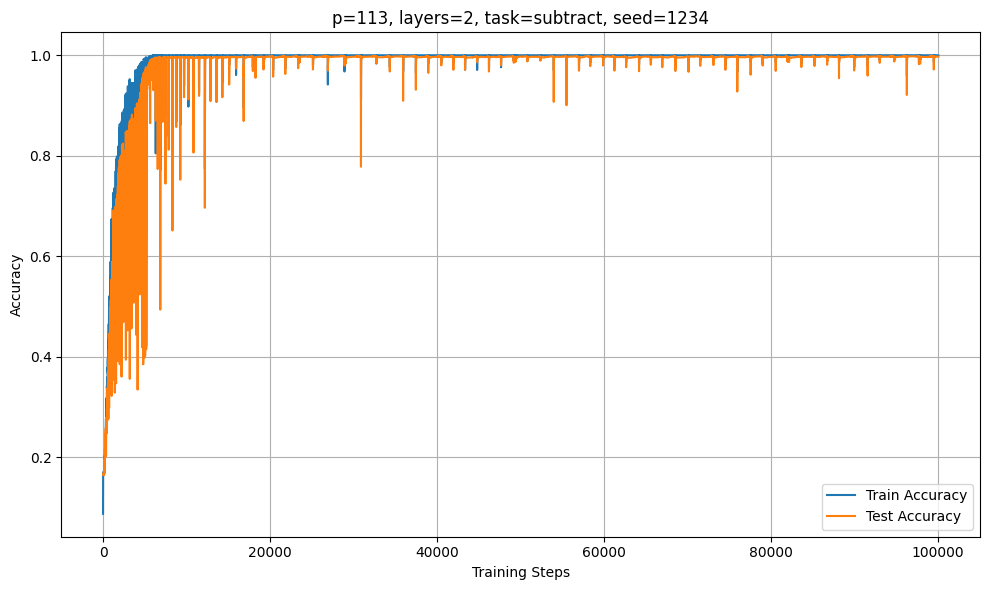

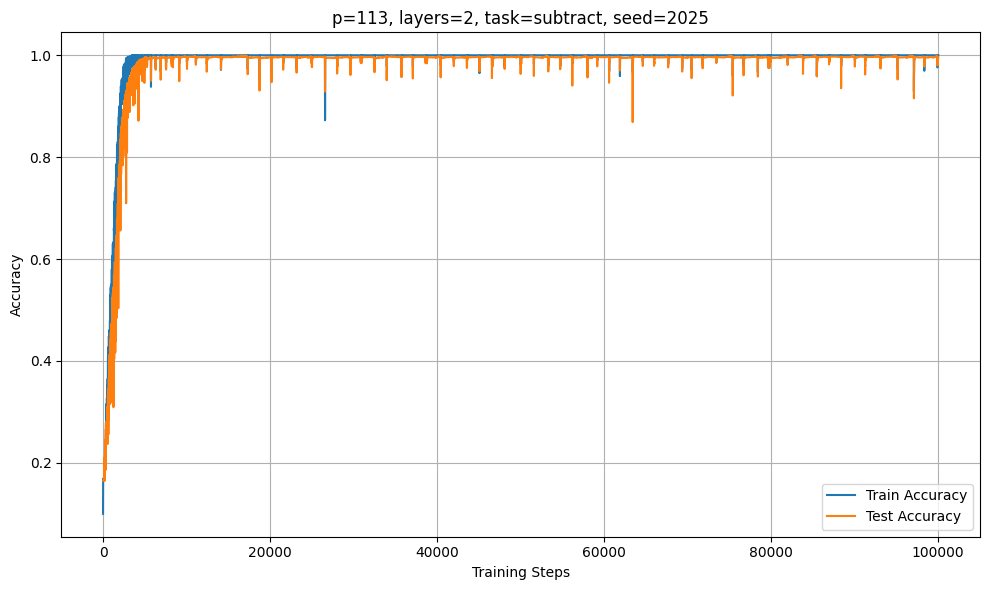

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs("plots", exist_ok=True)

idx = 0
p_values = [97, 113]
seeds = [42, 1234, 2025]
types = ['addition', 'subtract']

for num_layers in [1, 2]:
    for p in p_values:
        for name in types:
            for seed in seeds:
                steps = np.linspace(0, 1e5, len(train_accs[idx]))
                plt.figure(figsize=(10, 6))
                plt.plot(steps, train_accs[idx], label='Train Accuracy')
                plt.plot(steps, val_accs[idx], label='Test Accuracy')
                plt.xlabel("Training Steps")
                plt.ylabel("Accuracy")
                plt.title(f"p={p}, layers={num_layers}, task={name}, seed={seed}")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()
                filename = f"plots/p{p}_layers{num_layers}_{name}_seed{seed}.png"
                plt.savefig(filename)
                plt.show()
                idx += 1
